<a href="https://colab.research.google.com/github/priyankkalgaonkar/Predictive-Analysis-Using-Feature-Engineering/blob/master/Predictive_Analysis_Using_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Sales

Dataset of 1559 products across 10 stores (13 columns)



In [0]:
#Download database files (Train and Test) to Google Colab Notebook
!wget --no-check-certificate \
"https://datahack-prod.s3.amazonaws.com/train_file/Train_UWu5bXk.csv" \
-O "/srv/train.csv"

!wget --no-check-certificate \
"https://datahack-prod.s3.amazonaws.com/test_file/Test_u94Q5KV.csv" \
-O "/srv/test.csv"

--2019-12-11 06:12:24--  https://datahack-prod.s3.amazonaws.com/train_file/Train_UWu5bXk.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.88
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 869537 (849K) [text/plain]
Saving to: ‘/srv/train.csv’

/srv/train.csv      100%[===================>] 849.16K   703KB/s    in 1.2s    

2019-12-11 06:12:32 (703 KB/s) - ‘/srv/train.csv’ saved [869537/869537]

--2019-12-11 06:12:33--  https://datahack-prod.s3.amazonaws.com/test_file/Test_u94Q5KV.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.88
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 527709 (515K) [text/plain]
Saving to: ‘/srv/test.csv’

/srv/test.csv       100%[================

In [0]:
import pandas as pd
train=pd.read_csv('/srv/train.csv') #Loading train.csv
test=pd.read_csv('/srv/test.csv')  #Loading test.csv

In [0]:
train.head(4) #Checking if train.csv has data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [0]:
test.head(5) #Checking if test.csv has data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [0]:
train.isnull().sum() #Finding Null Values in train.csv

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
test.isnull().sum() #Finding Null Values in test.csv

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Since we have null values in `Item_Weight` and `Outlet_Size` columns in both: train and test files, we will fill the `Item_Weight` gaps with the average weight and `Outlet_Size` with `unknown` value.

In [0]:
#Filling Null Values in train.csv
train['Item_Weight'].fillna(value=test['Item_Weight'].mean(),inplace=True)
test['Outlet_Size'].fillna(value='Unknown', inplace=True)

#Filling Null Values in test.csv
train['Item_Weight'].fillna(value=test['Item_Weight'].mean(),inplace=True)
test['Outlet_Size'].fillna(value='Unknown', inplace=True)

#We'll now check to verify if all Null Values have been filled
train.isnull().sum() #Check Train DB

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
test.isnull().sum() #Check Test DB

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


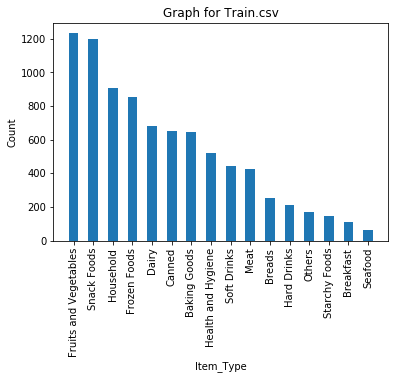

In [0]:
import numpy as np
import matplotlib.pyplot as plot
plot.bar(train['Item_Type'].value_counts().index, \
         train['Item_Type'].value_counts(), width=0.5, bottom=None, \
         align='center', data=train)
plot.title('Graph for Train.csv')
plot.xticks(rotation='vertical')
plot.xlabel('Item_Type')
plot.ylabel('Count')
print('Item_Type:\n', train['Item_Type'].value_counts())

In [0]:
#Using item identifier, we categorize 'Item_Type' into Non Consumables, Drinks and Foods
def item_identify(cols):
  item_id=cols[0]
  item_type=cols[1]

  if item_id[:2] == 'NC':
    return 'Non Consumables'
  elif item_id[:2] == 'DR':
    return 'Drinks'
  else:
    return 'Foods'

In [0]:
train['Item_Type']=train[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)
test['Item_Type']=test[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)

Item_Type:
 Foods              6125
Non Consumables    1599
Drinks              799
Name: Item_Type, dtype: int64


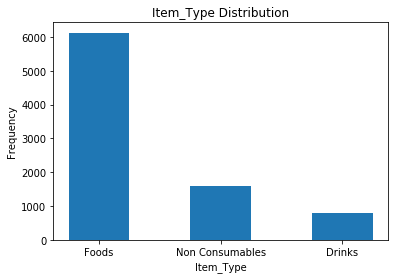

In [0]:
train['Item_Type'].value_counts()

import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['Item_Type'].value_counts().index, train['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Item_Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',train['Item_Type'].value_counts())

Item_Fat_Content:
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


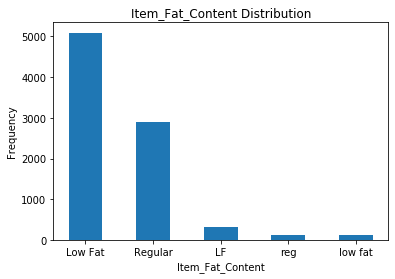

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['Item_Fat_Content'].value_counts().index, train['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',train['Item_Fat_Content'].value_counts())

In [0]:
# From the above graph we can see that there are actually two classes in 'Item_Fat_Content'. But some of the items are non consumables.  
def item_fat(cols):
  fat=cols[0]
  typ=cols[1]
  
  if (fat=='Low Fat' or fat=='LF' or fat=='low fat') and (typ=='Foods' or typ=='Drinks'):
    return 'Low Fat'
  elif (fat=='Regular' or fat=='reg') and (typ=='Foods' or typ=='Drinks'):
    return 'Regular'
  else:
    return 'Non Edible'

In [0]:
train['Item_Fat_Content']=train[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)
test['Item_Fat_Content']=test[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)

Item_Fat_Content:
 Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64


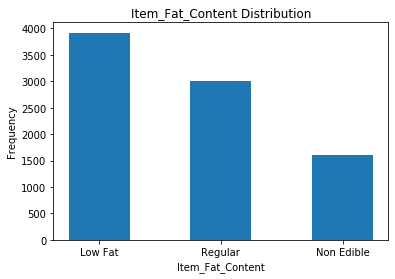

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['Item_Fat_Content'].unique(), train['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',train['Item_Fat_Content'].value_counts())

Text(0, 0.5, 'Frequency')

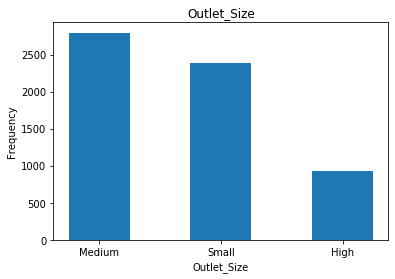

In [0]:
train['Outlet_Size'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['Outlet_Size'].value_counts().index, train['Outlet_Size'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Outlet_Size')
#plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Size')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

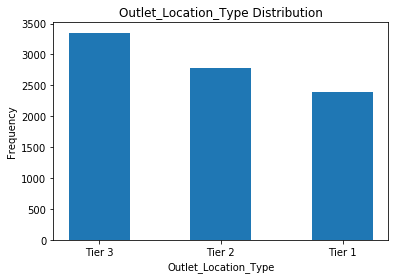

In [0]:
train['Outlet_Location_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['Outlet_Location_Type'].value_counts().index, train['Outlet_Location_Type'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Outlet_Location_Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Frequency')

In [0]:
train['Item_Visibility'].value_counts().head(3)

0.000000    526
0.076975      3
0.041283      2
Name: Item_Visibility, dtype: int64

In [0]:
#The column 'Item_Visibility' has lots of 0 values. Let's fill this values with the mean value
train['Item_Visibility'].mask(train['Item_Visibility']== 0,train['Item_Visibility'].mean(),inplace=True)
test['Item_Visibility'].mask(test['Item_Visibility']== 0,test['Item_Visibility'].mean(),inplace=True)

In [0]:
#Let's add a new feature that would have the number of years the outlet has been in operation till 2013. (This dataset is from 2013). 
def num_years(col):
  return 2013-col

In [0]:
train['Years_of_Operation']=train['Outlet_Establishment_Year'].apply(num_years)
test['Years_of_Operation']=test['Outlet_Establishment_Year'].apply(num_years)

In [0]:
# One hot encoding the categorical variables in both train and test set
item_fat_content=pd.get_dummies(train['Item_Fat_Content'])
item_type=pd.get_dummies(train['Item_Type'])
outlet_size=pd.get_dummies(train['Outlet_Size'])
outlet_location_type=pd.get_dummies(train['Outlet_Location_Type'])
output_type=pd.get_dummies(train['Outlet_Type'])

item_fat_content_test=pd.get_dummies(test['Item_Fat_Content'])
item_type_test=pd.get_dummies(test['Item_Type'])
outlet_size_test=pd.get_dummies(test['Outlet_Size'])
outlet_location_type_test=pd.get_dummies(test['Outlet_Location_Type'])
output_type_test=pd.get_dummies(test['Outlet_Type'])

In [0]:
train=pd.concat([train,item_fat_content,item_type,outlet_size,outlet_location_type,output_type],axis=1)
train.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)
test=pd.concat([test,item_fat_content_test,item_type_test,outlet_size_test,outlet_location_type_test,output_type_test],axis=1)
test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)

In [0]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_test=test

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

x_test=sc_x.fit_transform(x_test)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions=lm.predict(x_val)

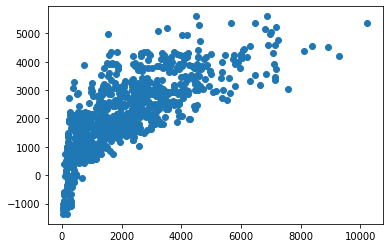

In [0]:
plot.scatter(y_val,predictions)

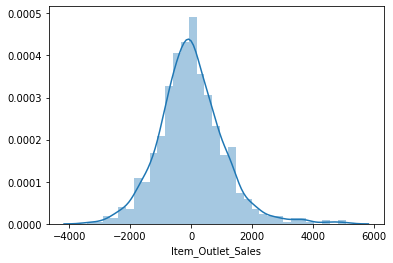

In [0]:
import seaborn as sns
sns.distplot((y_val-predictions))

In [0]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions))

Mean Absolute Error:  805.0298886589924
Mean Squared Error:  1179625.5233133475
Root Mean Squared Error:  1086.1056685761969
Explained Variance Score:  0.5781462410661773


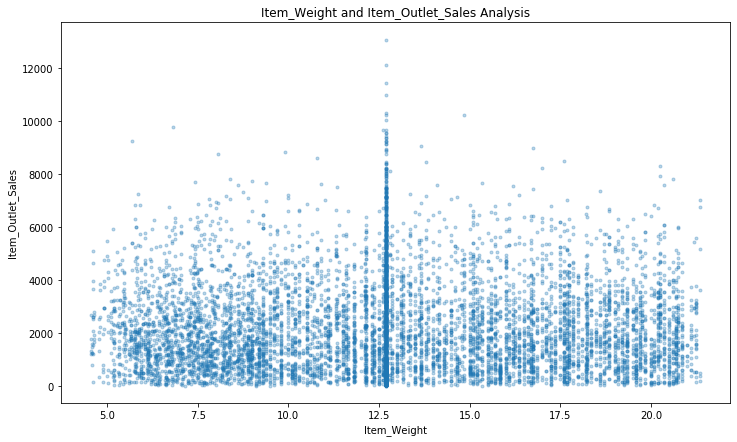

In [0]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

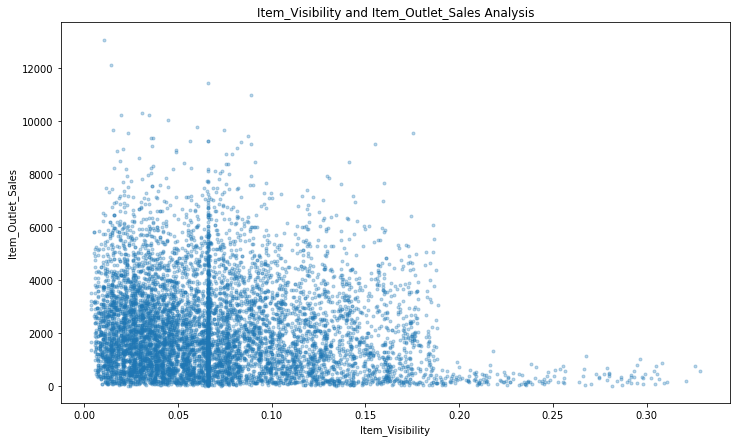

In [0]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)